In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor4.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [4]:
sensor.head()

,sensor,con,spl,date,time
0,sensor_4,2324.65875,70.652334,2016-06-21,00:00:00
1,sensor_4,3041.73875,81.499422,2016-06-21,04:00:00
2,sensor_4,2757.67250,77.785565,2016-06-21,08:00:00
3,sensor_4,2409.32625,73.503135,2016-06-21,12:00:00
4,sensor_4,2944.80375,74.061797,2016-06-21,16:00:00


C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


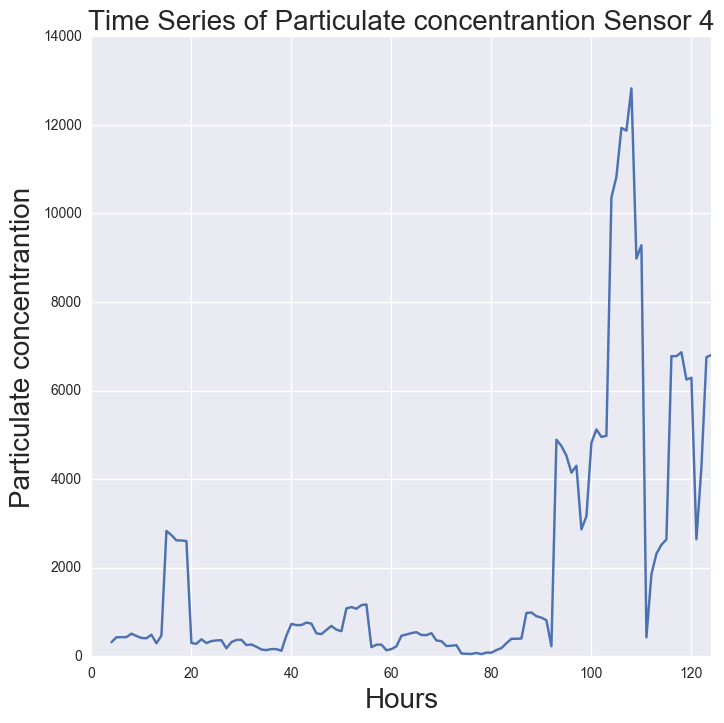

In [5]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.con,5).plot()
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate concentrantion Sensor 4', fontsize=20)

**Fig 19 **: Time Series after the rolling mean technique was applied of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 4.

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


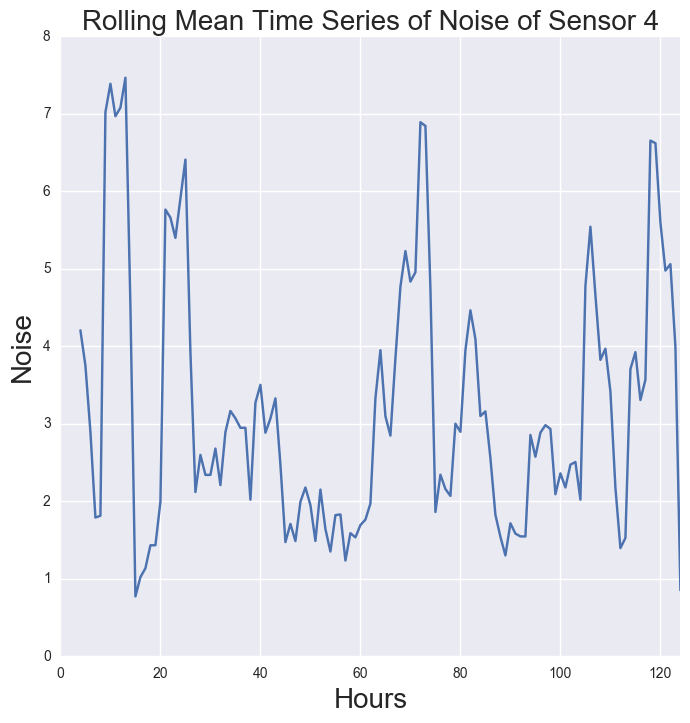

In [16]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.spl,5).plot()
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise", fontsize=20)
plt.title('Rolling Mean Time Series of Noise of Sensor 4', fontsize=20)

Fig 20: Time Series after the rolling mean technique was applied of Noise (db) by hour measured by sensor 4.

In [18]:
# to see if it is stacionary

In [19]:
sm.tsa.adfuller(sensor.con)

(-1.5791137577809176,
 0.4940762809987671,
 13L,
 111L,
 {'1%': -3.4906830827540469,
  '10%': -2.5808574442009578,
  '5%': -2.8879516565798817},
 2145.8421617080767)

As the number -1.5791137577809176 is less negative than the alphas so the null hypothesis is not reject what does mean is that it was not generated by stacionary process.

C:\Users\enrique\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


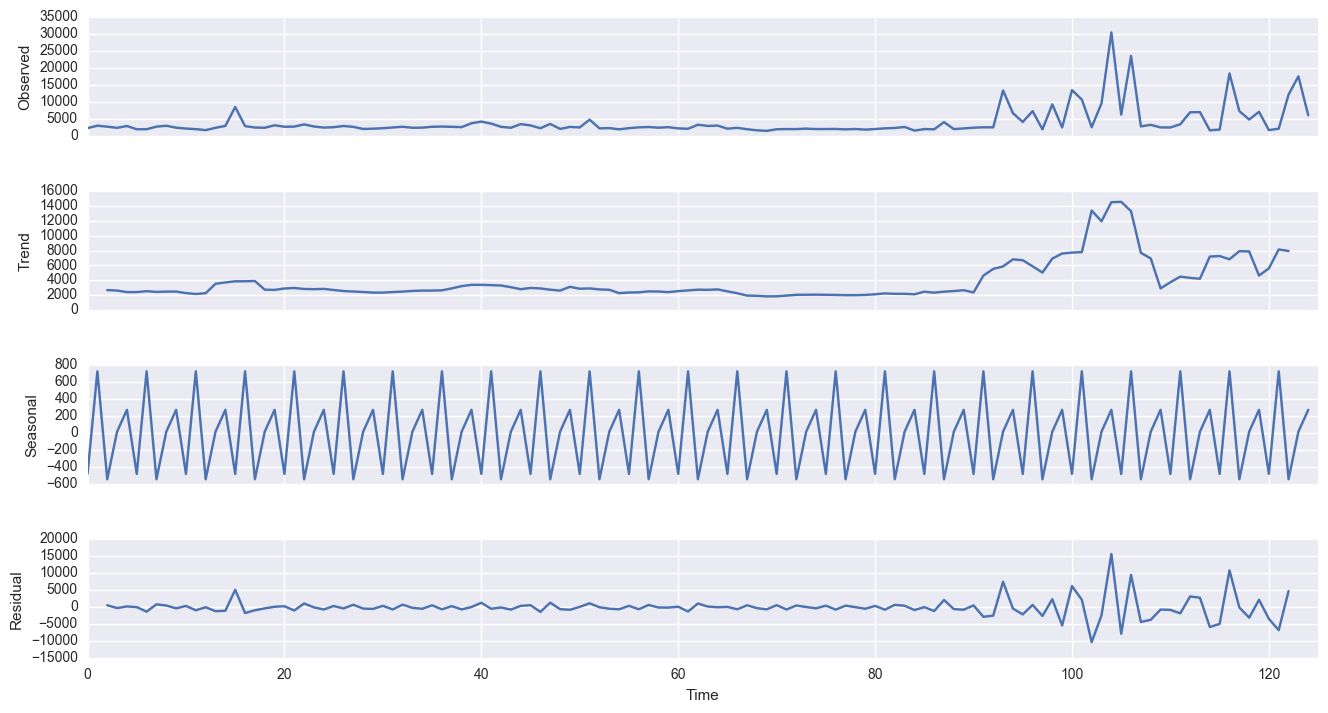

In [8]:
data_con = np.array(sensor.con)
decomposition = sm.tsa.seasonal_decompose(data_con, freq=5)
fig = plt.figure(figsize=(10,10)) 
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

**Fig 21 **: Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 4.

In [9]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

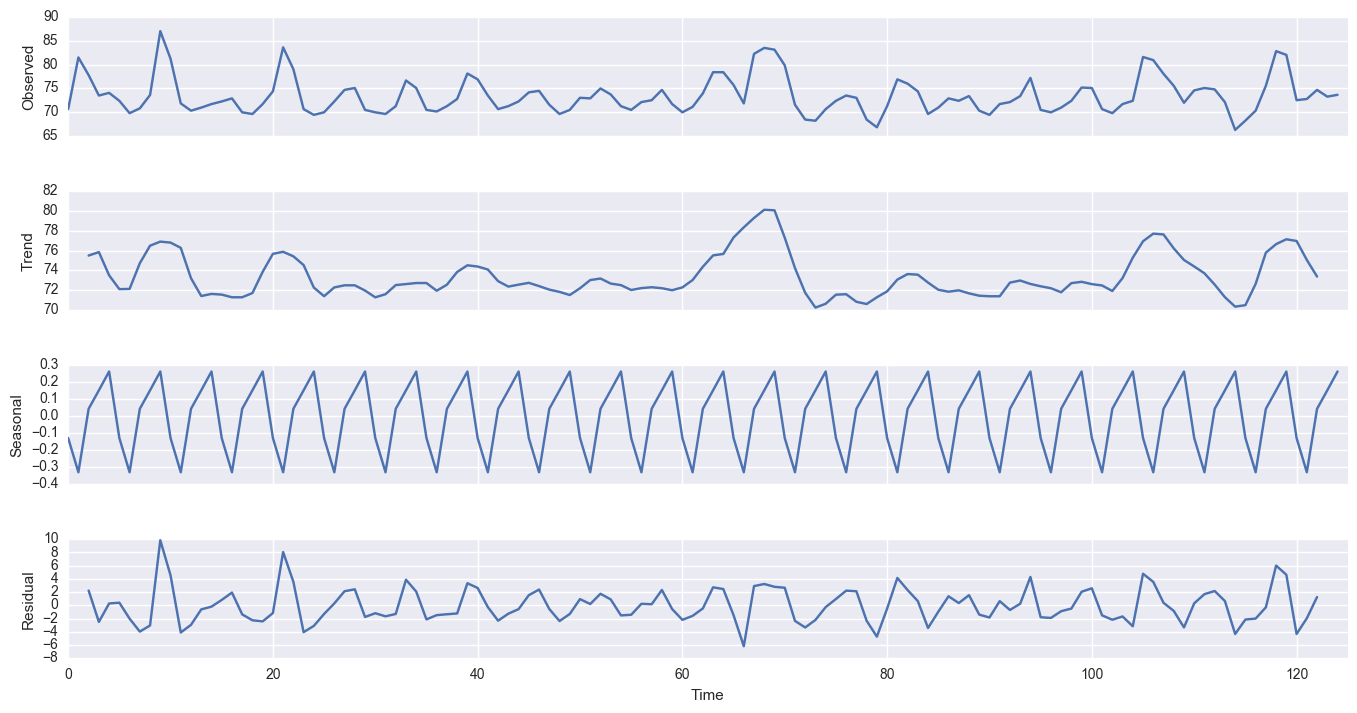

In [10]:
data_spl = np.array(sensor.spl)
decomposition = sm.tsa.seasonal_decompose(data_spl, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 22 **: Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by hour measured by sensor 4.

In [11]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [12]:
data_con_date = np.array(sensor_con_date.con)

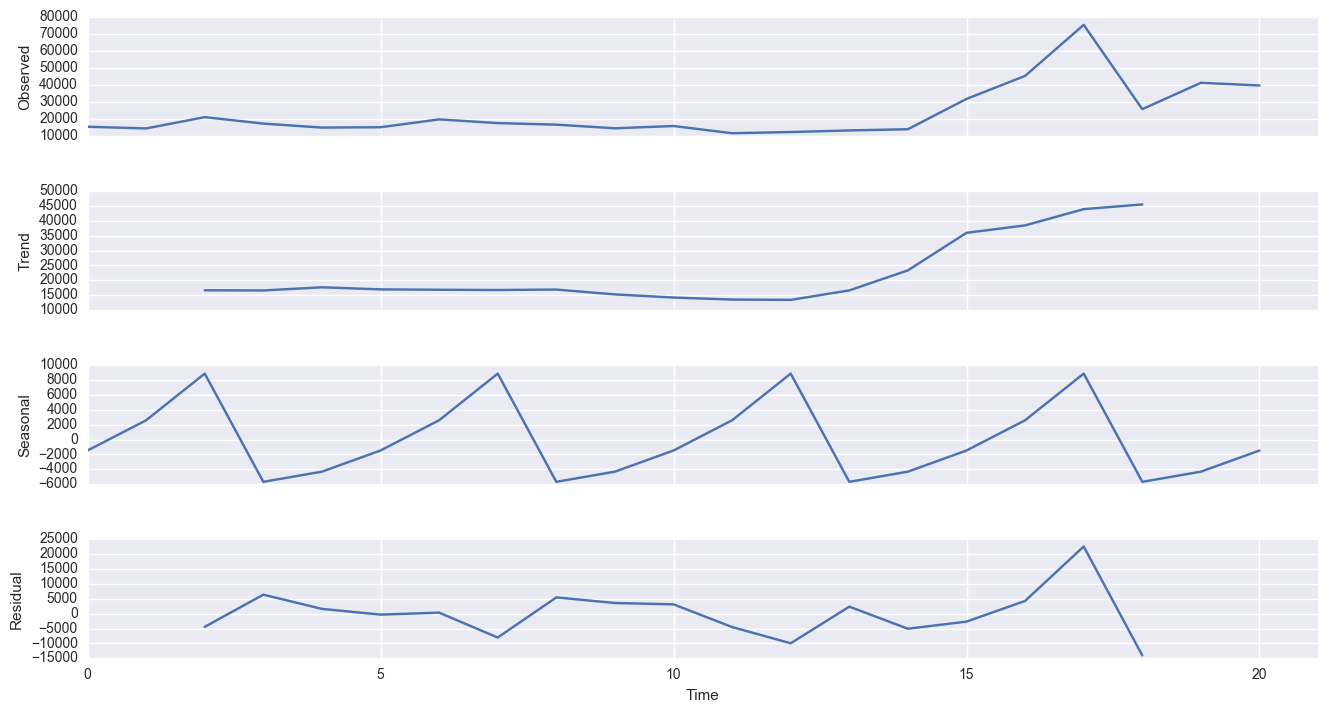

In [13]:
decomposition = sm.tsa.seasonal_decompose(data_con_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 13 :** Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by days measured by sensor 3.

In [14]:
data_spl_date = np.array(sensor_spl_date.spl)

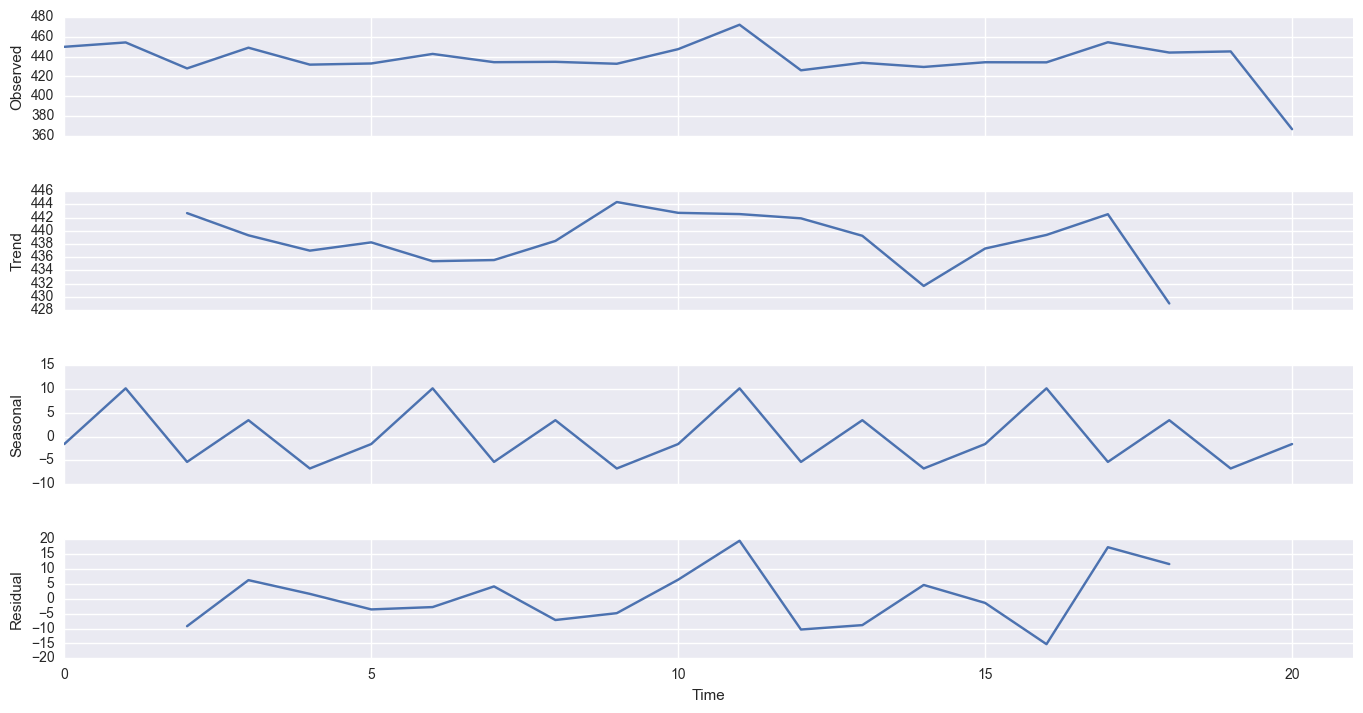

In [15]:
decomposition = sm.tsa.seasonal_decompose(data_spl_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 14: ** Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by days measured by sensor 3.